In [3]:
# Standard library imports
import argparse
import os

# Third party imports
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import pickle as pkl
import h5py
# Local imports
#import utils.video as uv  # for folder creation

In [4]:
df_or = pd.read_csv("data.csv")

In [5]:
df_or['class'] = df_or['videoname'].apply(lambda x: x.split('_')[0])

In [6]:
df_or

,videoname,axis,n_frame,n_landmark,coordinate,class
0,ustedes_25,x,0,0,0.503444,ustedes
1,ustedes_25,x,0,1,0.531401,ustedes
2,ustedes_25,x,0,2,0.548882,ustedes
3,ustedes_25,x,0,3,0.566963,ustedes
4,ustedes_25,x,0,4,0.476303,ustedes
...,...,...,...,...,...,...
407555,él_524,y,12,18,0.437323,él
407556,él_524,y,12,19,0.798151,él
407557,él_524,y,12,20,0.403665,él
407558,él_524,y,12,21,0.781035,él


In [7]:
df_new = df_or[["videoname", "coordinate"]]


In [8]:
df_new

,videoname,coordinate
0,ustedes_25,0.503444
1,ustedes_25,0.531401
2,ustedes_25,0.548882
3,ustedes_25,0.566963
4,ustedes_25,0.476303
...,...,...
407555,él_524,0.437323
407556,él_524,0.798151
407557,él_524,0.403665
407558,él_524,0.781035


In [7]:
df_new['new_col'] = range(1, len(df_new) + 1)

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_new

,videoname,coordinate,new_col
0,ustedes_25,0.503444,1
1,ustedes_25,0.531401,2
2,ustedes_25,0.548882,3
3,ustedes_25,0.566963,4
4,ustedes_25,0.476303,5
...,...,...,...
407555,él_524,0.437323,407556
407556,él_524,0.798151,407557
407557,él_524,0.403665,407558
407558,él_524,0.781035,407559


In [9]:
df_new.pivot(index='videoname', columns='new_col', values='coordinate')

new_col,1,2,3,4,5,6,7,8,9,10,...,407551,407552,407553,407554,407555,407556,407557,407558,407559,407560
videoname,,,,,,,,,,,,,,,,,,,,,
ustedes_25,0.503444,0.531401,0.548882,0.566963,0.476303,0.462477,0.449118,0.599518,0.428249,0.545454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-L-E-X_271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-L-E-X_275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-N-D-R-E-A_236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C A R B O H I D R A T O S_533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
él_295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
él_302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
él_311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_or.groupby("class").describe()

n_frame                                         \
                            count       mean        std  min   25%   50%   
class                                                                      
                           1380.0  10.266667   6.305371  0.0   6.0  10.5   
 ustedes                    460.0   8.100000   4.913500  0.0   4.0   8.5   
A-L-E-X                     920.0  10.500000   6.155582  0.0   6.0  10.5   
A-N-D-R-E-A                 460.0  20.200000  12.275487  0.0  10.0  21.0   
C A R B O H I D R A T O S   920.0  20.250000  13.205190  0.0   9.5  20.0   
...                           ...        ...        ...  ...   ...   ...   
voltear                     460.0   5.400000   3.043046  0.0   3.0   5.5   
volver                      460.0   9.700000   5.183475  0.0   6.0  10.5   
ya                         2760.0   6.600000   4.200761  0.0   4.0   6.5   
yo                         5980.0   7.215385   4.807423  0.0   4.0   7.0   
él                         3220.0   8.714286   6.508463  0.0   4.0   8.0   

                                      n_landmark        ...              \
                            75%   max      count  mean  ...   75%   max   
class                                                   ...               
                           15.0  24.0     1380.0  11.0  ...  17.0  22.0   
 ustedes                   12.0  16.0      460.0  11.0  ...  17.0  22.0   
A-L-E-X                    15.0  21.0      920.0  11.0  ...  17.0  22.0   
A-N-D-R-E-A                30.0  40.0      460.0  11.0  ...  17.0  22.0   
C A R B O H I D R A T O S  30.5  45.0      920.0  11.0  ...  17.0  22.0   
...                         ...   ...        ...   ...  ...   ...   ...   
voltear                     8.0  10.0      460.0  11.0  ...  17.0  22.0   
volver                     13.0  18.0      460.0  11.0  ...  17.0  22.0   
ya                          9.0  18.0     2760.0  11.0  ...  17.0  22.0   
yo                         10.0  24.0     5980.0  11.0  ...  17.0  22.0   
él                         12.0  27.0     3220.0  11.0  ...  17.0  22.0   

                          coordinate                                          \
                               count      mean       std       min       25%   
class                                                                          
                              1380.0  0.481858  0.185385  0.122559  0.300913   
 ustedes                       460.0  0.442514  0.166969  0.143148  0.298246   
A-L-E-X                        920.0  0.438679  0.182313  0.150125  0.269969   
A-N-D-R-E-A                    460.0  0.433134  0.184509  0.137750  0.243755   
C A R B O H I D R A T O S      920.0  0.451352  0.178343  0.125493  0.287301   
...                              ...       ...       ...       ...       ...   
voltear                        460.0  0.466761  0.171500  0.158805  0.316087   
volver                         460.0  0.469108  0.181517  0.144072  0.316708   
ya                            2760.0  0.474956  0.201056  0.148455  0.288604   
yo                            5980.0  0.429371  0.182722  0.098018  0.254451   
él                            3220.0  0.467314  0.218419  0.106564  0.248733   

                                                         
                                50%       75%       max  
class                                                    
                           0.493368  0.604941  0.867242  
 ustedes                   0.453212  0.550814  0.848963  
A-L-E-X                    0.426982  0.608746  0.809107  
A-N-D-R-E-A                0.468448  0.571834  0.815781  
C A R B O H I D R A T O S  0.457540  0.545462  0.894787  
...                             ...       ...       ...  
voltear                    0.483689  0.550676  0.954157  
volver                     0.464870  0.565109  0.899276  
ya                         0.474543  0.595678  0.921444  
yo                         0.442420  0.546891  0.905487  
él                         0.477255

In [12]:
df_or.groupby("class").agg({"videoname": "nunique"}).reset_index().describe()

,videoname
count,338.000000
mean,2.621302
std,3.910545
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,43.000000


In [13]:
df_or.groupby("videoname").agg({"n_frame": "nunique"}).rename(columns={"n_frame": "n_frames"}).describe()

,n_frames
count,886.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


In [14]:
#df_or.head(5)
df_or['recategorizado'] = pd.factorize(df_or['class'])[0] + 1

In [18]:
#new_dataframe = df_or.filter(['x','y','recategorizado'], axis=1

In [20]:
#from sklearn.neighbors import NearestNeighbors
#neigh = NearestNeighbors(n_neighbors=1)
#neigh.fit(new_dataframe)


In [ ]:
#X = [ [0.345141, 0.486088, 14]]
#array = neigh.kneighbors(X, return_distance=False)  #quiero que este número de array lo tome desde el final_dataframe
#print (array)

In [ ]:
#final_dataframe = df_or.filter(['x','y','class','recategorizado'], axis=1)
#print (final_dataframe)

In [ ]:
#final_dataframe.loc[12879, "class"]

In [ ]:
#final_dataframe.loc[array[0], "class"]

# Structure

In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/BRENDA/Documents/SOTA/KNN/data.csv')
df.head(2000)

,videoname,axis,n_frame,n_landmark,coordinate
0,NNN_179,x,0,0,0.487037
1,NNN_179,x,0,1,0.516697
2,NNN_179,x,0,2,0.536129
3,NNN_179,x,0,3,0.554883
4,NNN_179,x,0,4,0.475629
...,...,...,...,...,...
1995,abuelo_255,x,9,3,0.526187
1996,abuelo_255,x,9,4,0.450861
1997,abuelo_255,x,9,5,0.437548
1998,abuelo_255,x,9,6,0.423175


In [10]:
df = df[~df['videoname'].astype(str).str.startswith('NNN')]
df

,videoname,axis,n_frame,n_landmark,coordinate
1920,abuelo_255,x,0,0,0.536879
1921,abuelo_255,x,0,1,0.560019
1922,abuelo_255,x,0,2,0.574746
1923,abuelo_255,x,0,3,0.588373
1924,abuelo_255,x,0,4,0.514476
...,...,...,...,...,...
109435,él_524,y,12,19,0.798151
109436,él_524,y,12,20,0.403665
109437,él_524,y,12,21,0.781035
109438,él_524,y,12,22,0.433403


In [11]:
df['class'] = df['videoname'].apply(lambda x: x.split('_')[0])

In [12]:
df

,videoname,axis,n_frame,n_landmark,coordinate,class
1920,abuelo_255,x,0,0,0.536879,abuelo
1921,abuelo_255,x,0,1,0.560019,abuelo
1922,abuelo_255,x,0,2,0.574746,abuelo
1923,abuelo_255,x,0,3,0.588373,abuelo
1924,abuelo_255,x,0,4,0.514476,abuelo
...,...,...,...,...,...,...
109435,él_524,y,12,19,0.798151,él
109436,él_524,y,12,20,0.403665,él
109437,él_524,y,12,21,0.781035,él
109438,él_524,y,12,22,0.433403,él


In [15]:
#pre = df.loc[:,["videoname"]]
#pre

,videoname
1920,abuelo_255
1921,abuelo_255
1922,abuelo_255
1923,abuelo_255
1924,abuelo_255
...,...
109435,él_524
109436,él_524
109437,él_524
109438,él_524


In [14]:
#print(pd.unique(pre['videoname']))

['abuelo_255' 'abuelo_258' 'abuelo_262' 'abuelo_266' 'agua_184' 'agua_190'
 'agua_202' 'agua_399' 'ahora_243' 'ahora_690' 'ahora_739' 'ahora_793'
 'antes_114' 'antes_248' 'antes_82' 'antes_89' 'aprender_175'
 'aprender_18' 'aprender_217' 'aprender_34' 'aquí_189' 'aquí_19'
 'aquí_330' 'aquí_631' 'bien_241' 'bien_278' 'bien_294' 'bien_416'
 'carne_111' 'carne_218' 'carne_683' 'carne_98' 'casa_156' 'casa_19'
 'casa_256' 'casa_9' 'comer_312' 'comer_444' 'comer_477' 'comer_747'
 'continuar_106' 'continuar_26' 'continuar_356' 'continuar_88'
 'controlar_144' 'controlar_176' 'controlar_178' 'controlar_192'
 'cuerpo_476' 'cuerpo_597' 'cuerpo_599' 'cuerpo_605' 'cuánto_445'
 'cuánto_460' 'cuánto_703' 'cuánto_708' 'cómo_12' 'cómo_223' 'cómo_427'
 'cómo_90' 'decir_265' 'decir_276' 'decir_433' 'decir_789' 'dentro_241'
 'dentro_627' 'dentro_647' 'dentro_664' 'diferentes_471' 'diferentes_569'
 'diferentes_668' 'diferentes_689' 'ellos_746' 'ellos_754' 'ellos_767'
 'ellos_772' 'emoción_188' 'emoción_43'

In [20]:
x = df.groupby('videoname').agg({'coordinate':lambda x: list(x)})
x

,coordinate
videoname,
abuelo_255,"[0.536879301071167, 0.5600194334983826, 0.5747..."
abuelo_258,"[0.4505068957805633, 0.477267175912857, 0.4941..."
abuelo_262,"[0.4513375163078308, 0.472543329000473, 0.4872..."
abuelo_266,"[0.5043474435806274, 0.5157606601715088, 0.526..."
agua_184,"[0.5185397267341614, 0.542916476726532, 0.5581..."
...,...
yo_237,"[0.5290188789367676, 0.5529158115386963, 0.568..."
él_285,"[0.510455846786499, 0.533685564994812, 0.54895..."
él_295,"[0.5007103681564331, 0.5265403389930725, 0.543..."


In [21]:
temp = pd.DataFrame(x['coordinate'].tolist())
temp

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
0,0.536879,0.560019,0.574746,0.588373,0.514476,0.498891,0.487184,0.605967,0.457014,0.563008,...,0.680239,0.451336,0.708650,0.408340,0.741280,0.378446,0.695142,0.387260,0.683276,0.371629
1,0.450507,0.477267,0.494116,0.505951,0.430992,0.417016,0.403644,0.537296,0.398238,0.485602,...,0.698246,0.439561,0.657615,0.389346,0.661473,0.366553,0.636251,0.378047,0.625526,0.377634
2,0.451338,0.472543,0.487261,0.499483,0.424764,0.410258,0.395362,0.516860,0.364673,0.476544,...,0.684366,0.440477,0.636592,0.401662,0.648156,0.371538,0.612238,0.384219,0.602863,0.384543
3,0.504347,0.515761,0.526263,0.535340,0.479179,0.460419,0.441318,0.529941,0.397781,0.514813,...,0.692625,0.418013,0.674108,0.368999,0.692755,0.342286,0.662636,0.362826,0.648935,0.385251
4,0.518540,0.542916,0.558174,0.575456,0.492735,0.471874,0.453949,0.599943,0.424564,0.550026,...,0.727665,0.803506,0.480661,0.798891,0.473521,0.742080,0.464757,0.734659,0.464096,0.498866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.529019,0.552916,0.568337,0.585308,0.513109,0.500777,0.484550,0.615657,0.463690,0.554367,...,0.700387,0.469097,0.678721,0.439924,0.684832,0.407692,0.642581,0.413363,0.632482,0.382558
220,0.510456,0.533686,0.548950,0.562808,0.480997,0.461677,0.446023,0.585832,0.420506,0.544833,...,0.803612,0.816521,0.476476,0.875901,0.402914,0.830945,0.369892,0.811589,0.398821,0.503382
221,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.853271,0.833425,0.540693,0.882536,0.467590,0.837087,0.440428,0.820307,0.461492,0.506052
222,0.492722,0.525487,0.542215,0.555085,0.469453,0.452221,0.434530,0.580593,0.411698,0.528915,...,0.822105,0.820023,0.505502,0.863750,0.432645,0.812524,0.401690,0.795971,0.433360,0.501797


In [22]:
temp.insert(0,"instance",['abuelo_255','abuelo_258','abuelo_262','abuelo_266','agua_184','agua_190'
,'agua_202','agua_399','ahora_243','ahora_690','ahora_739','ahora_793'
,'antes_114','antes_248','antes_82','antes_89','aprender_175'
,'aprender_18','aprender_217','aprender_34','aquí_189','aquí_19'
,'aquí_330','aquí_631','bien_241','bien_278','bien_294','bien_416'
,'carne_111','carne_218','carne_683','carne_98','casa_156','casa_19'
,'casa_256','casa_9','comer_312','comer_444','comer_477','comer_747'
,'continuar_106','continuar_26','continuar_356','continuar_88'
,'controlar_144','controlar_176','controlar_178','controlar_192'
,'cuerpo_476','cuerpo_597','cuerpo_599','cuerpo_605','cuánto_445'
,'cuánto_460','cuánto_703','cuánto_708','cómo_12','cómo_223','cómo_427'
,'cómo_90','decir_265','decir_276','decir_433','decir_789','dentro_241'
,'dentro_627','dentro_647','dentro_664','diferentes_471','diferentes_569'
,'diferentes_668','diferentes_689','ellos_746','ellos_754','ellos_767'
,'ellos_772','emoción_188','emoción_43','emoción_71','emoción_81'
,'enojar_102','enojar_124','enojar_276','enojar_99','escribir_56'
,'escribir_60','escribir_62','escribir_807','ese_138','ese_143','ese_214'
,'ese_642','familia_165','familia_204','familia_45','familia_75'
,'frijol_132','frijol_175','frijol_216','frijol_434','fuerte_310'
,'fuerte_361','fuerte_363','fuerte_571','fácil_255','fácil_318'
,'fácil_319','fácil_341','grasa_396','grasa_534','grasa_553','grasa_557'
,'hacer_158','hacer_172','hacer_191','hacer_81','hermano_100'
,'hermano_150','hermano_39','hermano_40','hola_508','hola_509','hola_513'
,'hola_632','hoy_127','hoy_218','hoy_521','hoy_540','juntos_36'
,'juntos_519','juntos_618','juntos_621','mal_273','mal_301','mal_334'
,'mal_336','mamá_139','mamá_154','mamá_264','mamá_28','niños_2'
,'niños_510','niños_749','niños_776','no_108','no_166','no_289','no_462'
,'pensar_189','pensar_235','pensar_640','pensar_97','pero_376','pero_442'
,'pero_496','pero_611','planta_119','planta_133','planta_215','planta_435'
,'poder_162','poder_645','poder_77','poder_84','proteínas_370'
,'proteínas_572','proteínas_694','proteínas_784','quinto_23','quinto_3'
,'quinto_758','quinto_773','qué_212','qué_274','qué_304','qué_573'
,'recordar_169','recordar_206','recordar_247','recordar_62','sentir_187'
,'sentir_458','sentir_602','sentir_604','sexto_24','sexto_4','sexto_759'
,'sexto_774','sí_253','sí_281','sí_306','sí_633','también_114'
,'también_182','también_552','también_598','todo_320','todo_327'
,'todo_511','todo_606','tú_176','tú_229','tú_407','tú_80','venir_26'
,'venir_617','venir_806','venir_818','ver_128','ver_279','ver_49'
,'ver_622','ya_115','ya_125','ya_35','ya_350','yo_113','yo_164','yo_193'
,'yo_237','él_285','él_295','él_302','él_524'],True)

In [23]:
X = temp

In [24]:
Y = df.loc[:,"class"].unique()

In [25]:
X

,instance,0,1,2,3,4,5,6,7,8,...,470,471,472,473,474,475,476,477,478,479
0,abuelo_255,0.536879,0.560019,0.574746,0.588373,0.514476,0.498891,0.487184,0.605967,0.457014,...,0.680239,0.451336,0.708650,0.408340,0.741280,0.378446,0.695142,0.387260,0.683276,0.371629
1,abuelo_258,0.450507,0.477267,0.494116,0.505951,0.430992,0.417016,0.403644,0.537296,0.398238,...,0.698246,0.439561,0.657615,0.389346,0.661473,0.366553,0.636251,0.378047,0.625526,0.377634
2,abuelo_262,0.451338,0.472543,0.487261,0.499483,0.424764,0.410258,0.395362,0.516860,0.364673,...,0.684366,0.440477,0.636592,0.401662,0.648156,0.371538,0.612238,0.384219,0.602863,0.384543
3,abuelo_266,0.504347,0.515761,0.526263,0.535340,0.479179,0.460419,0.441318,0.529941,0.397781,...,0.692625,0.418013,0.674108,0.368999,0.692755,0.342286,0.662636,0.362826,0.648935,0.385251
4,agua_184,0.518540,0.542916,0.558174,0.575456,0.492735,0.471874,0.453949,0.599943,0.424564,...,0.727665,0.803506,0.480661,0.798891,0.473521,0.742080,0.464757,0.734659,0.464096,0.498866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,yo_237,0.529019,0.552916,0.568337,0.585308,0.513109,0.500777,0.484550,0.615657,0.463690,...,0.700387,0.469097,0.678721,0.439924,0.684832,0.407692,0.642581,0.413363,0.632482,0.382558
220,él_285,0.510456,0.533686,0.548950,0.562808,0.480997,0.461677,0.446023,0.585832,0.420506,...,0.803612,0.816521,0.476476,0.875901,0.402914,0.830945,0.369892,0.811589,0.398821,0.503382
221,él_295,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,...,0.853271,0.833425,0.540693,0.882536,0.467590,0.837087,0.440428,0.820307,0.461492,0.506052
222,él_302,0.492722,0.525487,0.542215,0.555085,0.469453,0.452221,0.434530,0.580593,0.411698,...,0.822105,0.820023,0.505502,0.863750,0.432645,0.812524,0.401690,0.795971,0.433360,0.501797


In [26]:
X['class'] = X['instance'].apply(lambda x: x.split('_')[0])

In [27]:
dataset = X.iloc[:,1:482]

In [41]:
dataset.to_csv( "new_data.csv" , index = False)

In [40]:
dataset.to_csv('dataset.csv')

In [29]:
X = dataset.iloc[:,:-1].values

In [30]:
Y = dataset.iloc[:,-1].values

In [31]:
X.shape

(224, 480)

In [32]:
X

array([[0.5368793 , 0.56001943, 0.57474613, ..., 0.38726029, 0.68327588,
        0.37162906],
       [0.4505069 , 0.47726718, 0.49411553, ..., 0.37804747, 0.62552571,
        0.37763438],
       [0.45133752, 0.47254333, 0.48726106, ..., 0.38421932, 0.60286337,
        0.38454291],
       ...,
       [0.50071037, 0.52654034, 0.54319745, ..., 0.82030672, 0.4614923 ,
        0.5060519 ],
       [0.49272183, 0.52548659, 0.54221517, ..., 0.79597104, 0.43336034,
        0.50179741],
       [0.50849628, 0.53693718, 0.55553871, ..., 0.78103507, 0.4334031 ,
        0.50345963]])

In [33]:
Y.shape

(224,)

In [34]:
Y

array(['abuelo', 'abuelo', 'abuelo', 'abuelo', 'agua', 'agua', 'agua',
       'agua', 'ahora', 'ahora', 'ahora', 'ahora', 'antes', 'antes',
       'antes', 'antes', 'aprender', 'aprender', 'aprender', 'aprender',
       'aquí', 'aquí', 'aquí', 'aquí', 'bien', 'bien', 'bien', 'bien',
       'carne', 'carne', 'carne', 'carne', 'casa', 'casa', 'casa', 'casa',
       'comer', 'comer', 'comer', 'comer', 'continuar', 'continuar',
       'continuar', 'continuar', 'controlar', 'controlar', 'controlar',
       'controlar', 'cuerpo', 'cuerpo', 'cuerpo', 'cuerpo', 'cuánto',
       'cuánto', 'cuánto', 'cuánto', 'cómo', 'cómo', 'cómo', 'cómo',
       'decir', 'decir', 'decir', 'decir', 'dentro', 'dentro', 'dentro',
       'dentro', 'diferentes', 'diferentes', 'diferentes', 'diferentes',
       'ellos', 'ellos', 'ellos', 'ellos', 'emoción', 'emoción',
       'emoción', 'emoción', 'enojar', 'enojar', 'enojar', 'enojar',
       'escribir', 'escribir', 'escribir', 'escribir', 'ese', 'ese',
       'ese'

In [180]:
y = Y #OJO, cambiar luego

In [100]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_Y = LabelEncoder()
Y= Labelencoder_Y.fit_transform(Y)

In [107]:
from sklearn.model_selection import train_test_split


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state =0)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [111]:
import matplotlib as plt

In [112]:
y_pred = knn.predict(X_test)
y_pred

array([17, 17, 16,  0, 10,  9, 11, 16, 23, 11,  6,  9,  1, 55,  9, 20, 20,
       21, 10, 12,  6,  1,  8,  2, 48,  3, 10, 10, 28,  9,  6, 13, 39, 10,
        5,  1,  8,  9, 11, 14, 24, 10, 21, 53, 16, 23, 34,  6, 39,  0, 54,
       34,  8, 20,  5, 29])

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
accuracy_score*100



10.714285714285714

In [2]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_train,y_pred)
accuracy_score*100

NameError: name 'y_train' is not defined

In [160]:
from matplotlib.colors import ListedColormap
X_set , y_set = X_test , y_test
X1, X2, X3 = np.meshgrid (np.arange(start = X_set[:,3].min() - 1, stop = X_set[:,6].max() + 1, step = 1),
                      np.arange(start = X_set[:,3].min() - 1, stop = X_set[:,478].max() + 1, step = 1), np.arange(start = X_set[:,3].min() - 1, stop = X_set[:,478].max() + 1, step = 1))




In [185]:
X.shape

(224, 479)

In [124]:
from matplotlib import pyplot as plt

In [161]:

plt.contourf(X1, X2, knn.predict(np.array ([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red', 'green')))
             
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

ValueError: X has 2 features, but KNeighborsClassifier is expecting 479 features as input.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

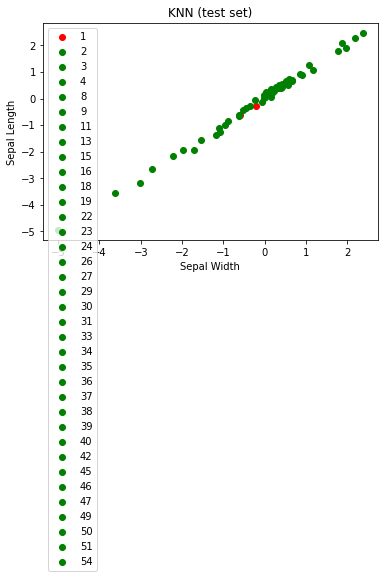

In [137]:
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0], X_set [y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (test set)')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()

In [162]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

In [164]:



from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [166]:
h=.02

In [170]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1




In [172]:
x_min.shape




()

In [173]:
x_max.shape

()

In [ ]:
y_min.shape
y_max.shape

In [174]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

In [175]:
xx.shape

(109, 109)

In [177]:
xx

array([[-0.58184594, -0.56184594, -0.54184594, ...,  1.53815406,
         1.55815406,  1.57815406],
       [-0.58184594, -0.56184594, -0.54184594, ...,  1.53815406,
         1.55815406,  1.57815406],
       [-0.58184594, -0.56184594, -0.54184594, ...,  1.53815406,
         1.55815406,  1.57815406],
       ...,
       [-0.58184594, -0.56184594, -0.54184594, ...,  1.53815406,
         1.55815406,  1.57815406],
       [-0.58184594, -0.56184594, -0.54184594, ...,  1.53815406,
         1.55815406,  1.57815406],
       [-0.58184594, -0.56184594, -0.54184594, ...,  1.53815406,
         1.55815406,  1.57815406]])

In [176]:
yy.shape

(109, 109)

In [178]:
yy

array([[-0.56560552, -0.56560552, -0.56560552, ..., -0.56560552,
        -0.56560552, -0.56560552],
       [-0.54560552, -0.54560552, -0.54560552, ..., -0.54560552,
        -0.54560552, -0.54560552],
       [-0.52560552, -0.52560552, -0.52560552, ..., -0.52560552,
        -0.52560552, -0.52560552],
       ...,
       [ 1.55439448,  1.55439448,  1.55439448, ...,  1.55439448,
         1.55439448,  1.55439448],
       [ 1.57439448,  1.57439448,  1.57439448, ...,  1.57439448,
         1.57439448,  1.57439448],
       [ 1.59439448,  1.59439448,  1.59439448, ...,  1.59439448,
         1.59439448,  1.59439448]])

In [169]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

ValueError: X has 2 features, but KNeighborsClassifier is expecting 479 features as input.

In [42]:
X = dataframe.data[:, :479]
y = dataframe.target
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

NameError: name 'dataframe' is not defined

In [194]:
X

array([[0.56001943, 0.57474613, 0.58837336, ..., 0.38726029, 0.68327588,
        0.37162906],
       [0.47726718, 0.49411553, 0.50595069, ..., 0.37804747, 0.62552571,
        0.37763438],
       [0.47254333, 0.48726106, 0.49948317, ..., 0.38421932, 0.60286337,
        0.38454291],
       ...,
       [0.52654034, 0.54319745, 0.55660897, ..., 0.82030672, 0.4614923 ,
        0.5060519 ],
       [0.52548659, 0.54221517, 0.55508476, ..., 0.79597104, 0.43336034,
        0.50179741],
       [0.53693718, 0.55553871, 0.56973654, ..., 0.78103507, 0.4334031 ,
        0.50345963]])

[[0.56001943 0.57474613]
 [0.47726718 0.49411553]
 [0.47254333 0.48726106]
 [0.51576066 0.52626294]
 [0.54291648 0.55817366]
 [0.50831378 0.52344543]
 [0.50456184 0.52220148]
 [0.51623034 0.53054798]
 [0.48003516 0.49680808]
 [0.52461928 0.54097331]
 [0.51035023 0.528023  ]
 [0.50849783 0.52409744]
 [0.48891351 0.50455678]
 [0.49985784 0.51303446]
 [0.54192555 0.55910033]
 [0.53837979 0.55567348]
 [0.52383184 0.54378134]
 [0.54835069 0.56632668]
 [0.56117803 0.57555163]
 [0.53355598 0.54643309]
 [0.52445716 0.54326421]
 [0.52462584 0.53613442]
 [0.52454412 0.54341084]
 [0.54959285 0.56734413]
 [0.49586695 0.5103249 ]
 [0.46068928 0.47702494]
 [0.54413831 0.55539101]
 [0.53447241 0.55173814]
 [0.5229308  0.54181534]
 [0.51838392 0.53024888]
 [0.51303691 0.52684724]
 [0.52086842 0.53496653]
 [0.53569967 0.55274493]
 [0.52759033 0.54544681]
 [0.47221318 0.48515612]
 [0.52012736 0.52985674]
 [0.53069168 0.54799461]
 [0.53408837 0.55020541]
 [0.5239116  0.54233956]
 [0.51445997 0.53724784]


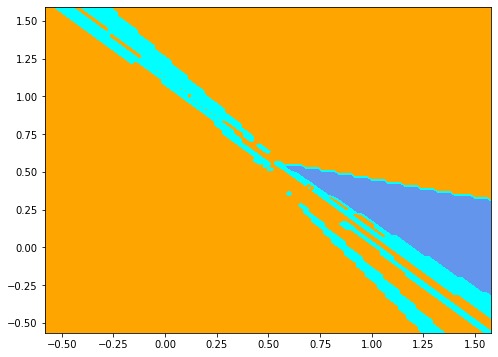

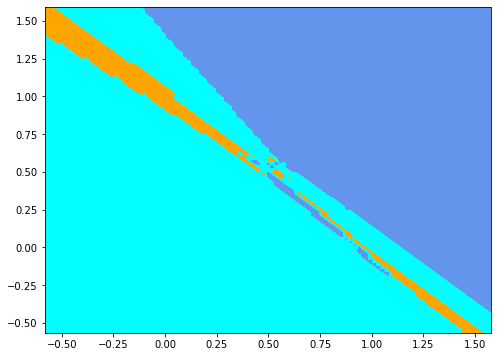

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15
h = 0.02  # step size in the mesh

X = X[:, :479]
#y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    
    clf.fit(X, y)
    print(X)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  #error
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    '''
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    '''
plt.show()